# whole blood optimum number of cpgs for linear regression
DC

#### This notebook:
* 

#### Conclusions:
* 



#### Imports

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
import csv
import os
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
plt.rcdefaults()

#### Import our modules

In [5]:
import age_predict.Loading_EWAS_Aging_Data as le
import age_predict.Regression as rg
import age_predict.Pickle_unpickle as pu

In [6]:
# View working directory
os.getcwd()

'/Users/dcox/Desktop/EWAS-organized/blood/feature_selection/optimum_cogs'

In [11]:
data_path = '../../../data/'
cpg_path = '../../saved_features/'
save_models_path = '../saved_models/'

#### Get Saved imputed whole blood data 2259 cpgs

In [8]:
df_p_working = pd.read_csv(data_path + 'df_p_working_ranked.csv', index_col=0)
df_p_saved = pd.read_csv(data_path +  'df_p_saved_ranked.csv', index_col=0)

#### Get Saved blood cpg rankings

In [12]:
cpgs_XGboost_blood_ranked = pu.get_pickled_object(cpg_path + 'cpgs_XGboost_blood_ranked')

In [13]:
cpgs_XGboost_ranked = cpgs_XGboost_blood_ranked 
top100 = cpgs_XGboost_ranked[:100]

### Finding Optimium number of cpgs for linear regression

In [14]:
# Run linear regression CV=100  nukmber of times for each number of cpgs in the num_cpgs list
# and record metrics.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

CV=100
mod = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=6)
num_cpgs = [10, 20, 30, 50, 100,200,500,1000,2000]
y = df_p_working.age
mean_mses = []
mean_rmses = []
mean_maes = []
mean_r2s = []
mean_rsquaes = []
std_mses = []
std_rmses = []
std_maes = []
std_r2s = []
std_rsquaes = []
for num in num_cpgs:
    X = df_p_working[cpgs_XGboost_blood_ranked]
    mses = []
    rmses = []
    maes = []
    r2s = []
    rsquaes = []
    for i in range(CV):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
        mod.fit(X_train, y_train)
        y_pred = mod.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        rMSE = mean_squared_error(y_test, y_pred, squared=False)
        MAE = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mses.append(MSE)
        rmses.append(rMSE)
        maes.append(MAE)
        r2s.append(r2)
    mean_mses.append(np.array(mses).mean())
    mean_rmses.append(np.array(rmses).mean())
    mean_maes.append(np.array(maes).mean())
    mean_r2s.append(np.array(r2s).mean())
    std_mses.append(np.array(mses).std())
    std_rmses.append(np.array(rmses).std())
    std_maes.append(np.array(maes).std())
    std_r2s.append(np.array(r2s).std())
    print(f'\nThe top {num} cpgs where used, CV={CV}')
    print(f'mean MSE = {np.array(mses).mean():.3f} ± {np.array(mses).std()/(CV**0.5):.3f} ste')
    print(f'mean rMSE = {np.array(rmses).mean():.3f} ± {np.array(rmses).std()/(CV**0.5):.3f} ste')
    print(f'mean MAE = {np.array(maes).mean():.3f} ± {np.array(maes).std()/(CV**0.5):.3f} ste')
    print(f'mean r2 = {np.array(r2s).mean():.3f} ± {np.array(r2s).std()/(CV**0.5):.3f} ste')


The top 10 cpgs where used, CV=100
mean MSE = 30.010 ± 0.321 ste
mean rMSE = 5.471 ± 0.029 ste
mean MAE = 3.985 ± 0.014 ste
mean r2 = 0.929 ± 0.001 ste

The top 20 cpgs where used, CV=100
mean MSE = 29.623 ± 0.322 ste
mean rMSE = 5.435 ± 0.030 ste
mean MAE = 3.944 ± 0.016 ste
mean r2 = 0.929 ± 0.001 ste

The top 30 cpgs where used, CV=100
mean MSE = 29.463 ± 0.270 ste
mean rMSE = 5.422 ± 0.025 ste
mean MAE = 3.939 ± 0.013 ste
mean r2 = 0.930 ± 0.001 ste

The top 50 cpgs where used, CV=100
mean MSE = 29.905 ± 0.324 ste
mean rMSE = 5.461 ± 0.029 ste
mean MAE = 3.968 ± 0.015 ste
mean r2 = 0.929 ± 0.001 ste

The top 100 cpgs where used, CV=100
mean MSE = 29.247 ± 0.260 ste
mean rMSE = 5.403 ± 0.024 ste
mean MAE = 3.938 ± 0.013 ste
mean r2 = 0.931 ± 0.001 ste

The top 200 cpgs where used, CV=100
mean MSE = 29.475 ± 0.354 ste
mean rMSE = 5.420 ± 0.032 ste
mean MAE = 3.927 ± 0.014 ste
mean r2 = 0.930 ± 0.001 ste

The top 500 cpgs where used, CV=100
mean MSE = 29.599 ± 0.258 ste
mean rMSE = 5

In [15]:
for num_cpg, rmse in zip(num_cpgs, mean_rmses):
    print(f'{num_cpg} , {rmse:.3f}')

10 , 5.471
20 , 5.435
30 , 5.422
50 , 5.461
100 , 5.403
200 , 5.420
500 , 5.435
1000 , 5.484
2000 , 5.461


### Bar plots of results

In [16]:
num_s = ['10', '20', '30', '50', '100','200','500','1000','2000']

Text(0, 8, 'eror bars = standard error of mean')

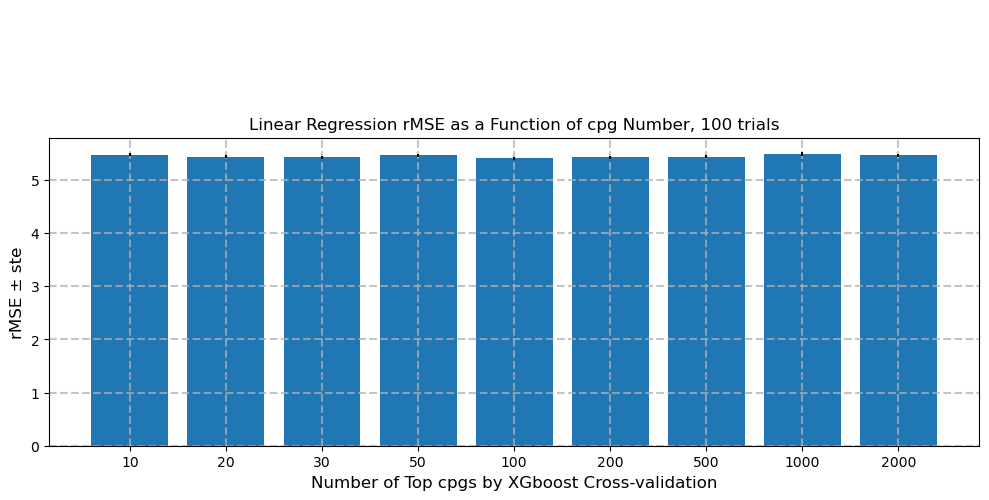

In [17]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_rmses)/CV**0.5
plt.bar(num_s, mean_rmses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('rMSE ± ste', fontsize = fz)
plt.title('Linear Regression rMSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error of mean', (0, 8), fontsize=10)


Text(0, 70, 'eror bars = standard error of mean')

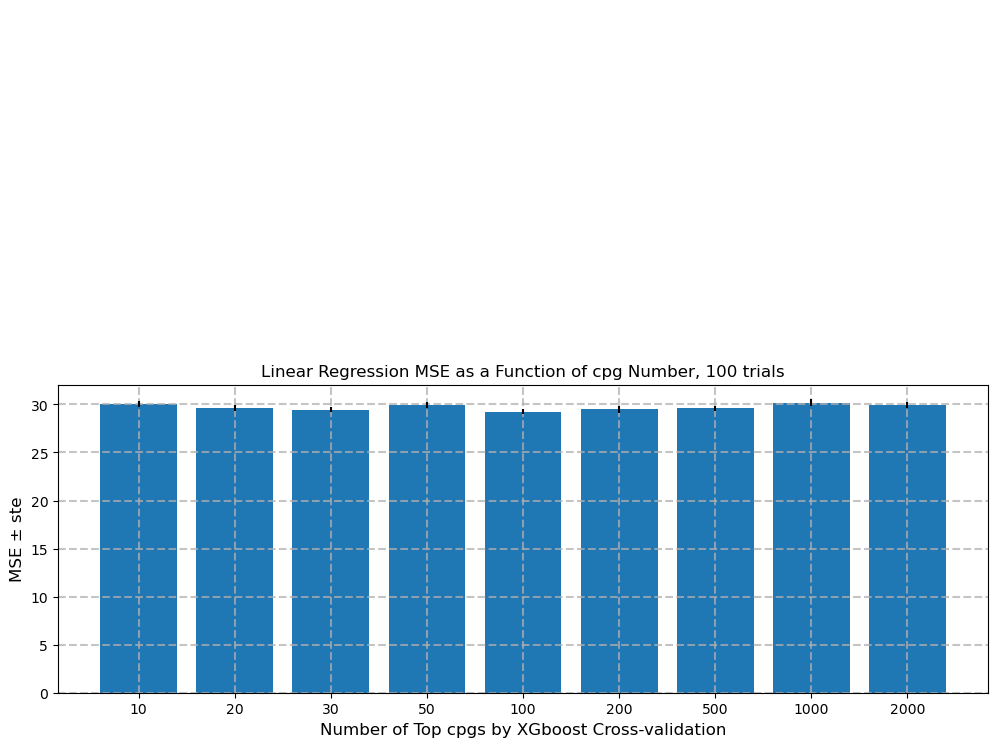

In [18]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)/CV**0.5
plt.bar(num_s, mean_mses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MSE ± ste', fontsize = fz)
plt.title('Linear Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error of mean', (0, 70), fontsize=10)

Text(0, 6, 'eror bars = standard error of mean')

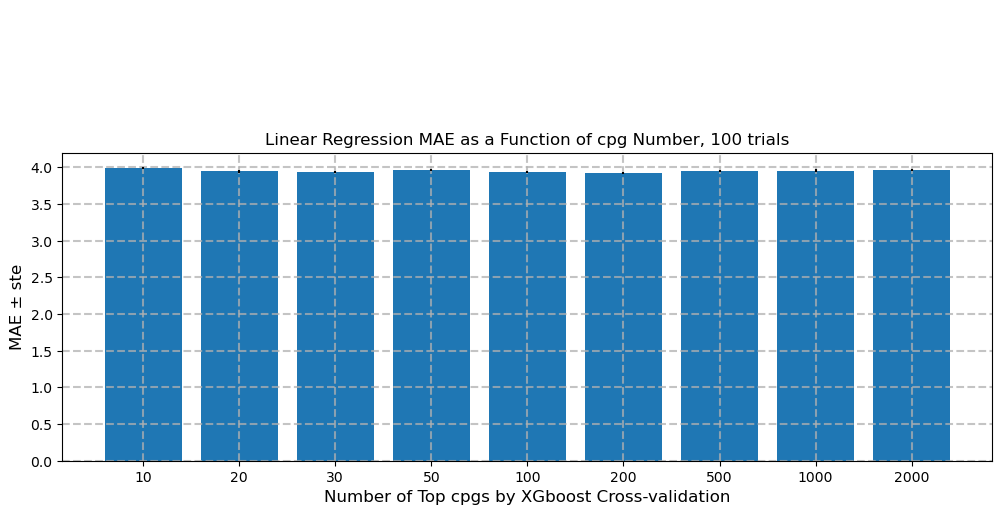

In [19]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_maes)/CV**0.5
plt.bar(num_s, mean_maes, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MAE ± ste', fontsize = fz)
plt.title('Linear Regression MAE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error of mean', (0, 6), fontsize=10)

Text(0, 0.7, 'eror bars = standard error of mean')

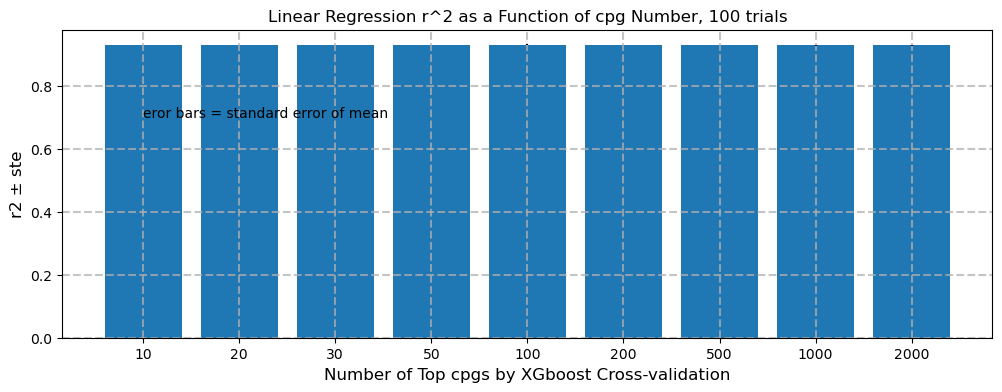

In [20]:
fz = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_r2s)/CV**0.5
plt.bar(num_s, mean_r2s, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('r2 ± ste', fontsize = fz)
plt.title('Linear Regression r^2 as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error of mean', (0, 0.7), fontsize=10)

Text(0, 70, 'eror bars = standard deviation of mean')

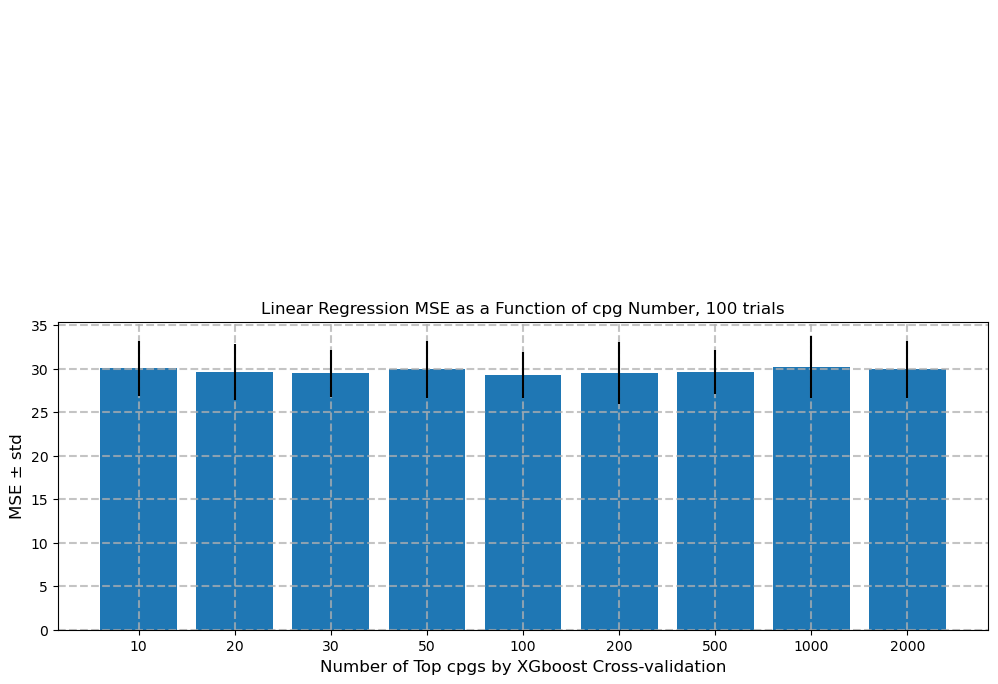

In [21]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)
plt.bar(num_s, mean_mses, yerr = ystes)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.ylabel('MSE ± std', fontsize = fz)
plt.title('Linear Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard deviation of mean', (0, 70), fontsize=10)

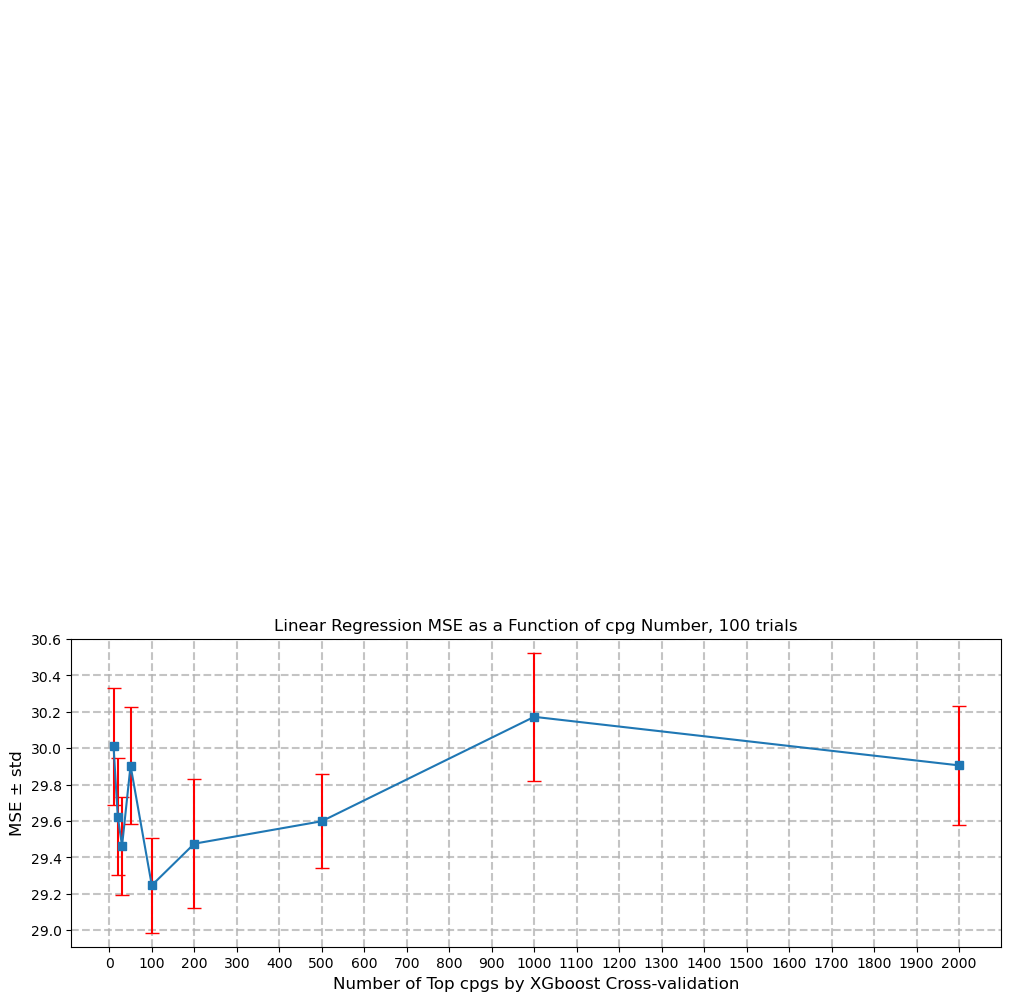

In [22]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_mses)/CV**0.5
plt.errorbar(num_cpgs, mean_mses, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('MSE ± std', fontsize = fz)
plt.title('Linear Regression MSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (250, 34), fontsize=10)
plt.show()

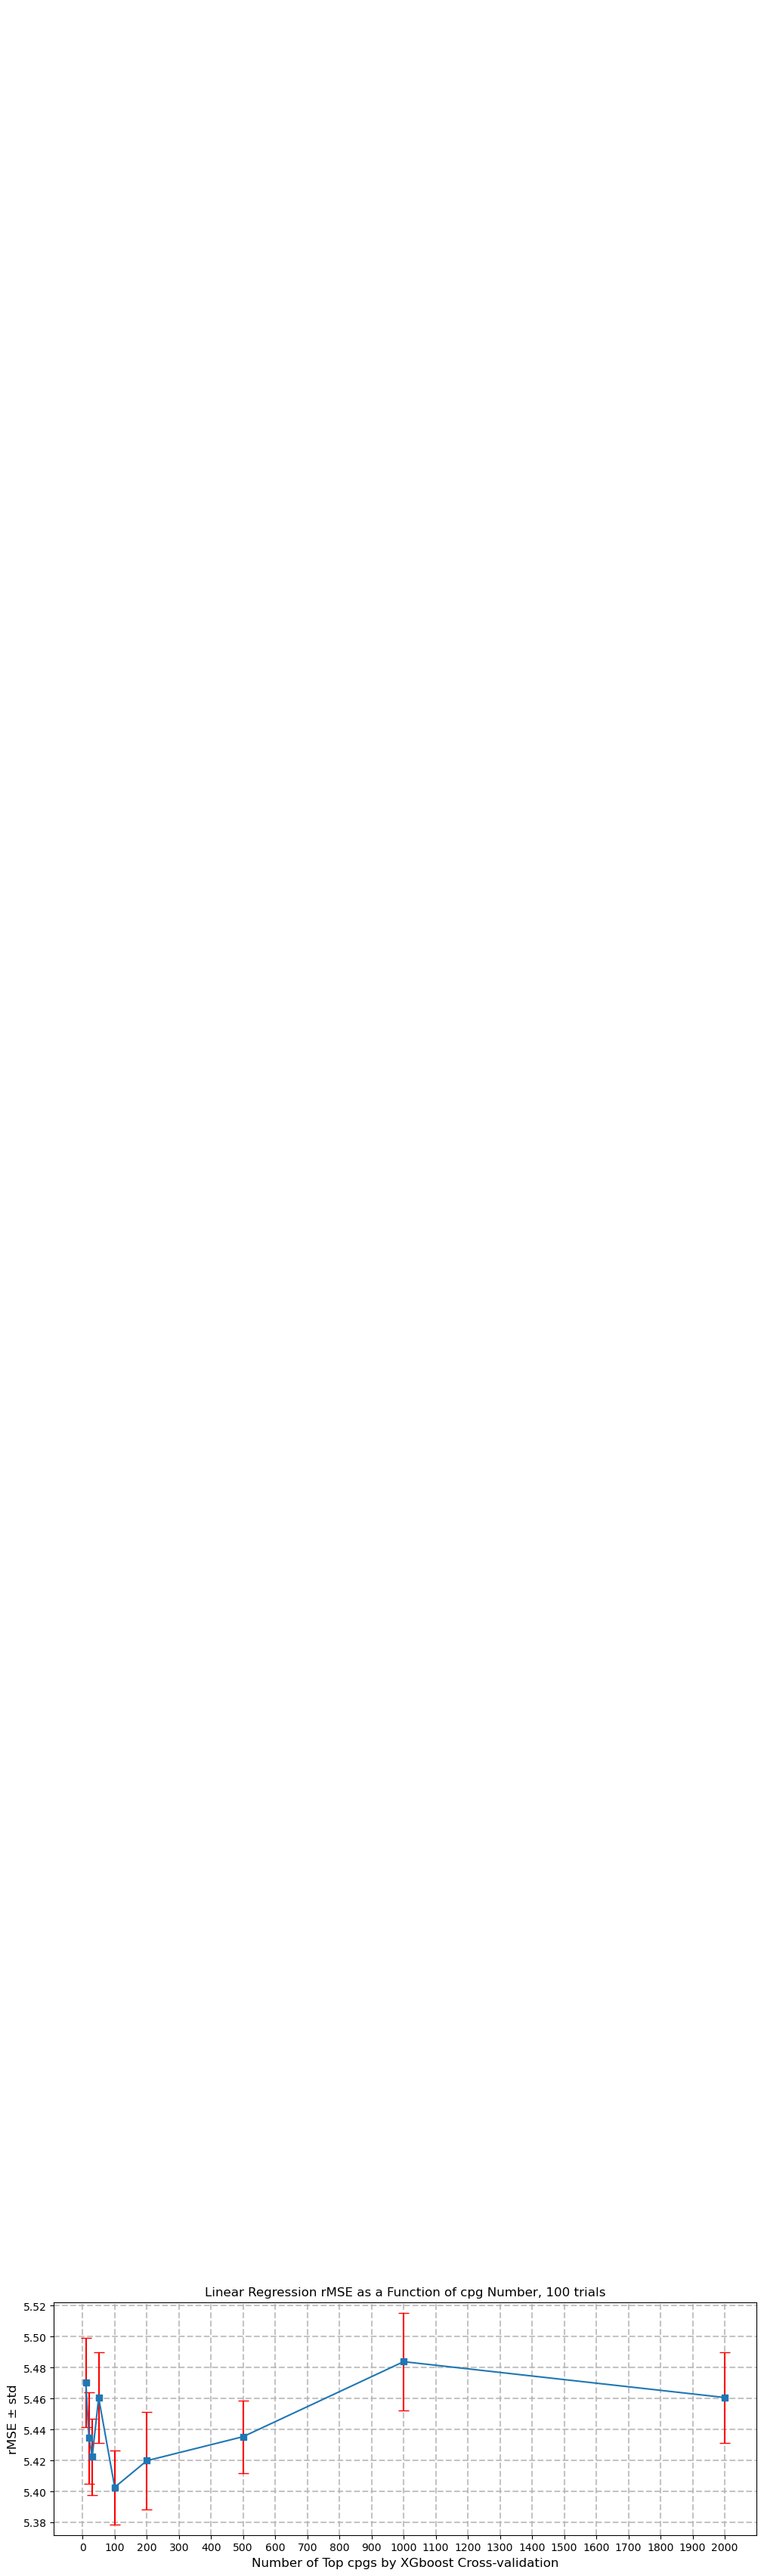

In [23]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_rmses)/CV**0.5
plt.errorbar(num_cpgs, mean_rmses, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('rMSE ± std', fontsize = fz)
plt.title('Linear Regression rMSE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (700, 7), fontsize=10)
plt.show()

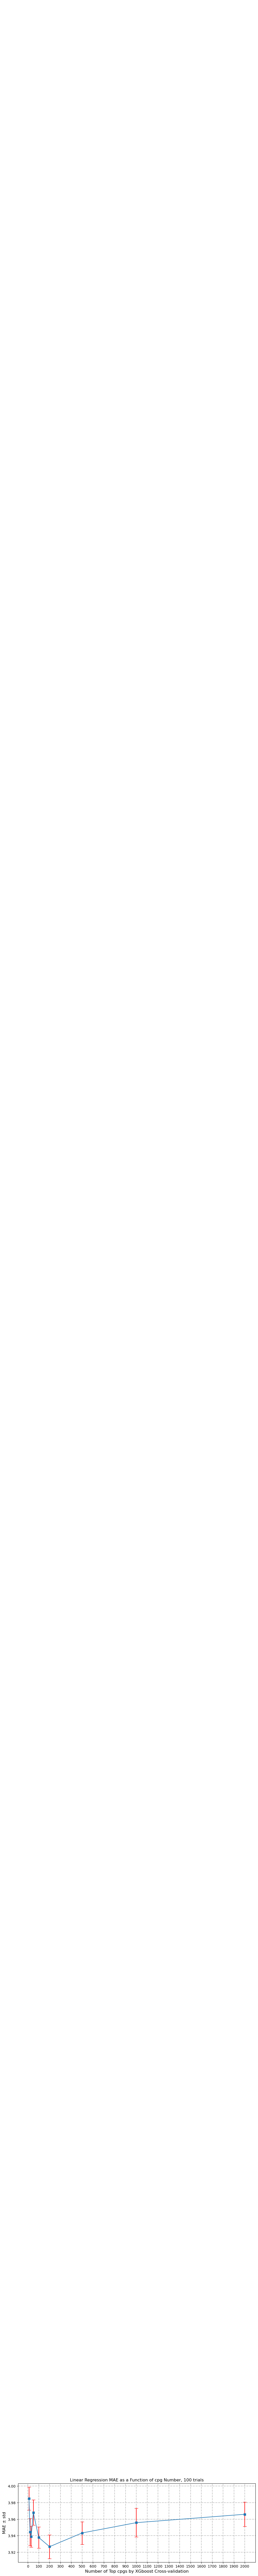

In [24]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_maes)/CV**0.5
plt.errorbar(num_cpgs, mean_maes, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('MAE ± std', fontsize = fz)
plt.title('Linear Regression MAE as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (700, 7), fontsize=10)
plt.show()

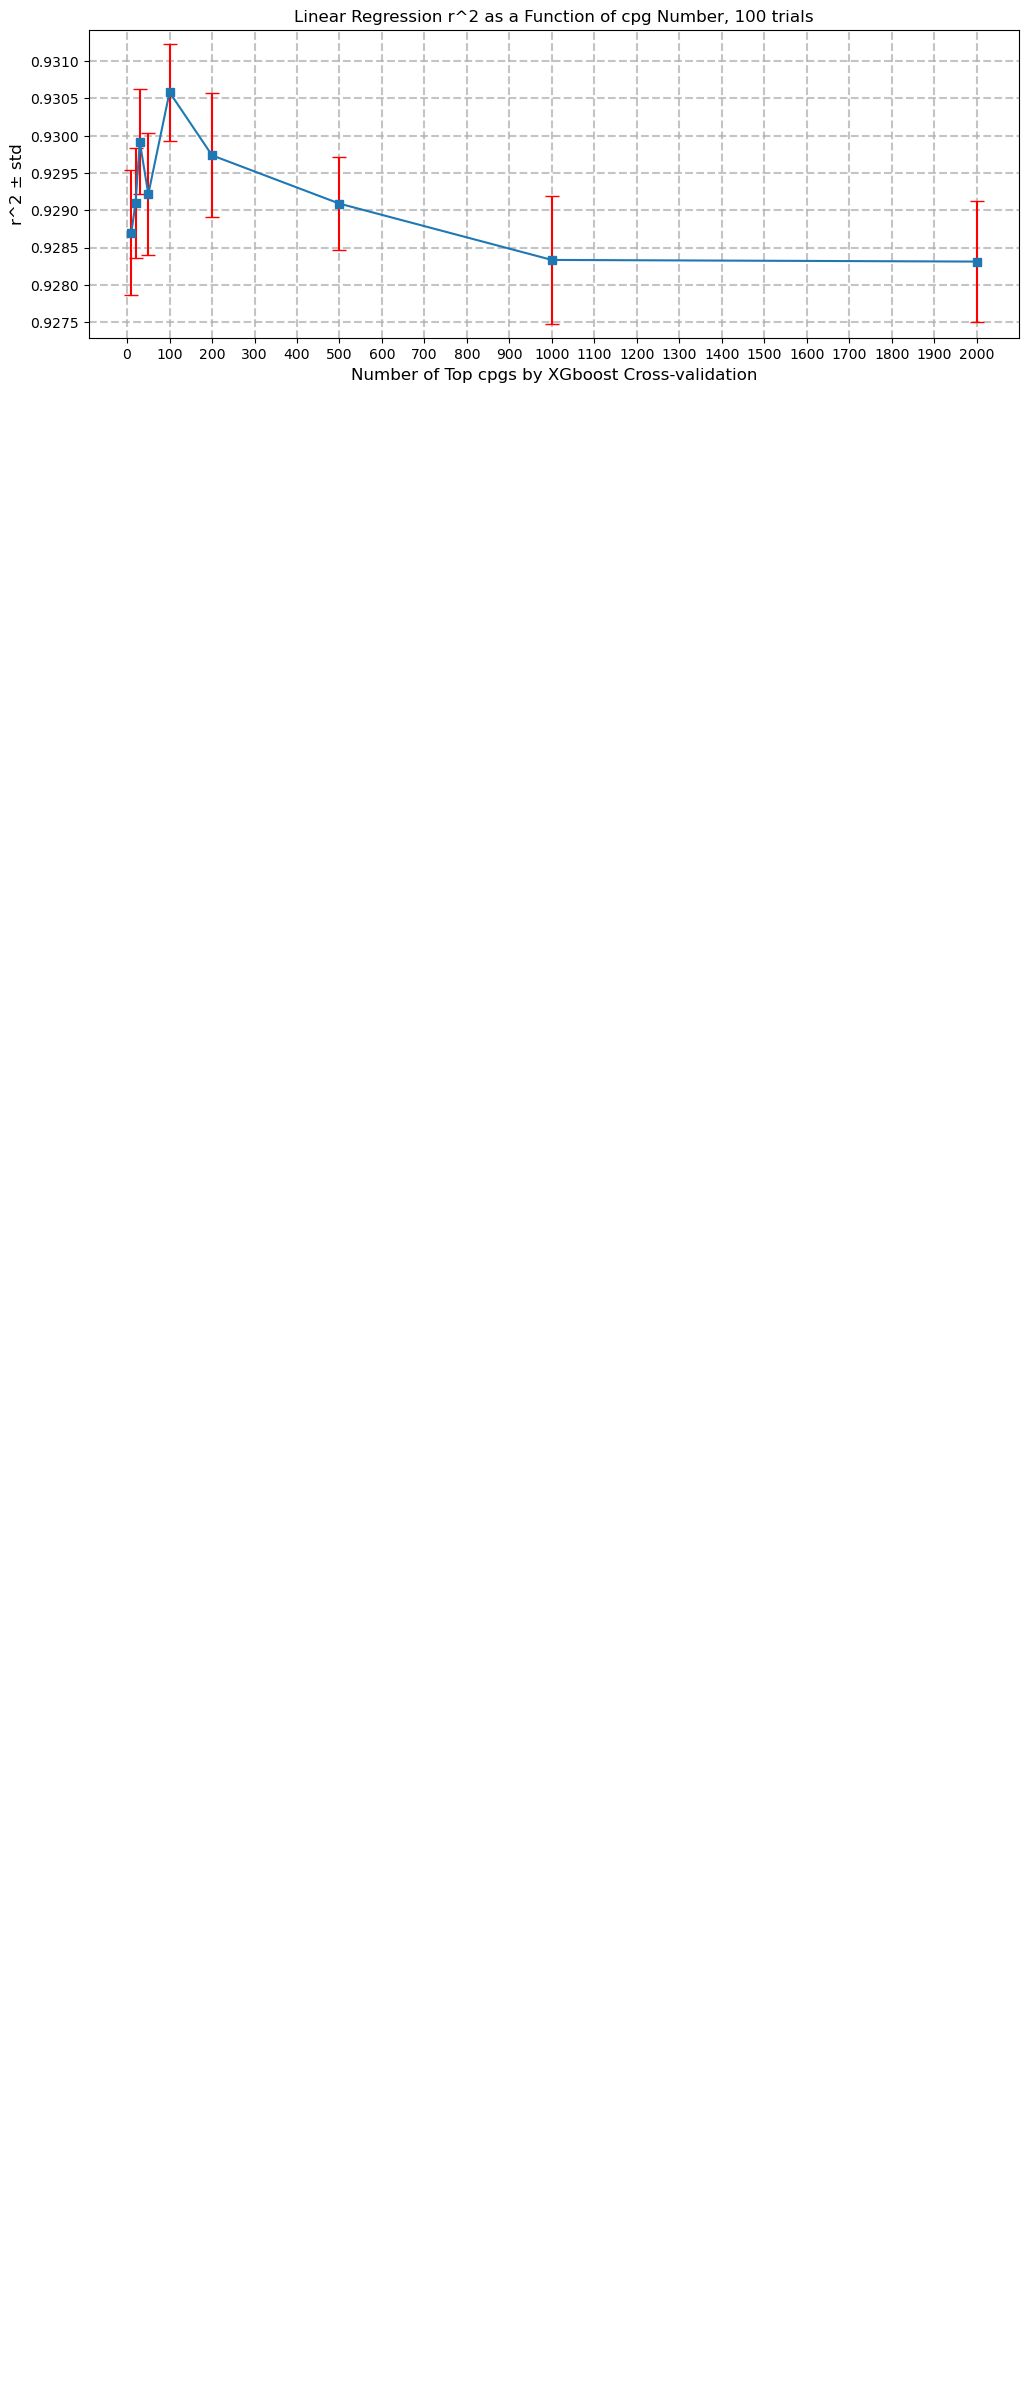

In [25]:
z = 12
plt.rcdefaults()
plt.figure(figsize=(12, 4))
ystes = np.array(std_r2s)/CV**0.5
plt.errorbar(num_cpgs, mean_r2s, marker='s', ecolor='r', yerr = ystes,capsize=5)
plt.xlabel('Number of Top cpgs by XGboost Cross-validation', fontsize = fz)
plt.xticks(range(0,2100,100))
plt.ylabel('r^2 ± std', fontsize = fz)
plt.title('Linear Regression r^2 as a Function of cpg Number, 100 trials', fontsize = fz)
plt.grid(True, lw=1.5, ls='--', alpha=0.75)
plt.annotate('eror bars = standard error', (700, 0.90), fontsize=10)
plt.show()